# MED-PC Data Processing Notebook

## Importing the Python Libraries

In [1]:
import sys
import glob
from collections import defaultdict
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from medpc2excel.medpc_read import medpc_read

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
import extract.dataframe
import processing.tone
import extract.metadata

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (10,6)

## Getting the Metadata from all the files

In [6]:
all_med_pc_file = glob.glob("./data/timestamp_dataframes/*.txt")

In [7]:
all_med_pc_file[:10]

['./data/timestamp_dataframes/2022-04-27_12h33m_Subject .txt',
 './data/timestamp_dataframes/2022-05-02_16h17m_Subject debug_dim_vs_list.txt',
 './data/timestamp_dataframes/2022-05-06_12h59m_Subject 3.4 (2).txt',
 './data/timestamp_dataframes/2022-05-06_08h37m_Subject 2.3.txt',
 './data/timestamp_dataframes/2022-05-06_12h59m_Subject 4.3 (3).txt',
 './data/timestamp_dataframes/2022-05-04_08h43m_Subject 2.3.txt',
 './data/timestamp_dataframes/2022-04-27_12h44m_Subject .txt',
 './data/timestamp_dataframes/2022-05-03_12h52m_Subject 2.1.txt',
 './data/timestamp_dataframes/2022-05-04_10h11m_Subject 1.2.txt',
 './data/timestamp_dataframes/2022-05-06_08h37m_Subject 1.1.txt']

In [8]:
file_path_to_meta_data = extract.metadata.get_all_med_pc_meta_data_from_files(list_of_files=all_med_pc_file)

## Making a Dataframe out of the Metadata

In [9]:
metadata_df = pd.DataFrame.from_dict(file_path_to_meta_data, orient="index")
metadata_df = metadata_df.reset_index()

In [10]:
metadata_df.head()

,index,File,Start Date,End Date,Subject,Experiment,Group,Box,Start Time,End Time,MSN
0,./data/timestamp_dataframes/2022-04-27_12h33m_...,C:\MED-PC\Data\2022-04-27_12h33m_Subject .txt,04/27/22,04/27/22,,,,1,12:33:52,12:34:18,testing_NP_CS_reward_laserepochON1st
1,./data/timestamp_dataframes/2022-05-02_16h17m_...,C:\MED-PC\Data\2022-05-02_16h17m_Subject debug...,05/02/22,05/02/22,debug_dim_vs_list,0,0,1,16:17:21,16:24:18,debug_dim_vs_list
2,./data/timestamp_dataframes/2022-05-06_12h59m_...,C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock
3,./data/timestamp_dataframes/2022-05-06_08h37m_...,C:\MED-PC\Data\2022-05-06_08h37m_Subject 2.3.txt,05/06/22,05/06/22,2.3,Pilot of Pilot,Cage 1,1,08:37:09,09:53:25,levelNP_CS_reward_laserepochON1st_noshock
4,./data/timestamp_dataframes/2022-05-06_12h59m_...,C:\MED-PC\Data\2022-05-06_12h59m_Subject 4.3 (...,05/06/22,05/06/22,4.3 (3),Pilot of Pilot,Cage 4,2,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock


In [11]:
metadata_df.groupby("Subject").count()

,index,File,Start Date,End Date,Experiment,Group,Box,Start Time,End Time,MSN
Subject,,,,,,,,,,
,28,28,28,28,28,28,28,28,28,28
0,9,9,9,9,9,9,9,9,9,9
1.1,5,5,5,5,5,5,5,5,5,5
1.2,5,5,5,5,5,5,5,5,5,5
1.3,5,5,5,5,5,5,5,5,5,5
1.4,5,5,5,5,5,5,5,5,5,5
2.1,6,6,6,6,6,6,6,6,6,6
2.2,5,5,5,5,5,5,5,5,5,5
2.3,5,5,5,5,5,5,5,5,5,5


In [12]:
metadata_df["Subject"].unique()

array(['', 'debug_dim_vs_list', '3.4 (2)', '2.3', '4.3 (3)', '2.1', '1.2',
       '1.1', '2.4', 'leveled_meghan', '0', '3.2 (2)', '4.4 (4)', '1.3',
       '3.1 (1)', '2.2', '1.4', '4.2 (3)', '3.3 (4)', '4.1 (1)', 'test'],
      dtype=object)

## Inputting all the MED-PC log files

- **Please make sure that the corresponding `.mpc` file (aka the MED-PC script) that was ran to create the log file, is also in the same folder**

In [13]:
file_path_to_med_pc_data = defaultdict(dict)
for file_path in all_med_pc_file[:]:
    try:
        # Reading in the MED-PC log file
        ts_df, log = medpc_read(file=file_path, override = True, replace = False)
        date_key, subject_key, med_pc_df = extract.dataframe.get_med_pc_dataframe(medpc_read_dictionary_output=ts_df)
        file_path_to_med_pc_data[file_path]["date_key"] = date_key
        file_path_to_med_pc_data[file_path]["subject_key"] = subject_key
        file_path_to_med_pc_data[file_path]["med_pc_df"] = med_pc_df
    except:
        print("Look over {}".format(file_path))

Look over ./data/timestamp_dataframes/2022-05-02_16h17m_Subject debug_dim_vs_list.txt


/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSN_dict[thisDate] = MSN_dict[thisDate].append({'ID':subject,'Box':box,'MSN':programname},ignore_index=True)
/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSN_dict[thisDate] = MSN_dict[thisDate].append({'ID':subject,'Box':box,'MSN':programname},ignore_index=True)
/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Look over ./data/timestamp_dataframes/2022-05-03_10h16m_Subject .txt
Look over ./data/timestamp_dataframes/2022-05-03_13h19m_Subject 1.2.txt
Look over ./data/timestamp_dataframes/2022-05-02_13h54m_Subject .txt
Look over ./data/timestamp_dataframes/2022-04-27_14h18m_Subject .txt
Look over ./data/timestamp_dataframes/2022-04-27_14h19m_Subject .txt
Look over ./data/timestamp_dataframes/2022-04-27_14h15m_Subject .txt
Look over ./data/timestamp_dataframes/2022-05-03_13h19m_Subject 2.1.txt
Look over ./data/timestamp_dataframes/2022-05-02_13h52m_Subject .txt


/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSN_dict[thisDate] = MSN_dict[thisDate].append({'ID':subject,'Box':box,'MSN':programname},ignore_index=True)
/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSN_dict[thisDate] = MSN_dict[thisDate].append({'ID':subject,'Box':box,'MSN':programname},ignore_index=True)


Look over ./data/timestamp_dataframes/2022-05-02_13h51m_Subject 0.txt
Look over ./data/timestamp_dataframes/2022-05-03_11h42m_Subject 2.3.txt
Look over ./data/timestamp_dataframes/2022-04-29_12h44m_Subject 0.txt
Look over ./data/timestamp_dataframes/2022-04-29_10h50m_Subject .txt
Look over ./data/timestamp_dataframes/2022-05-03_11h42m_Subject 2.2.txt
Look over ./data/timestamp_dataframes/2022-03-25_12h20m_Subject .txt
Look over ./data/timestamp_dataframes/2022-05-03_11h42m_Subject 1.1.txt
Look over ./data/timestamp_dataframes/2022-05-03_19h16m_Subject .txt
Look over ./data/timestamp_dataframes/2022-04-29_14h14m_Subject test.txt
Look over ./data/timestamp_dataframes/2022-05-03_13h19m_Subject 2.4.txt
Look over ./data/timestamp_dataframes/2022-05-03_18h55m_Subject 0.txt
Look over ./data/timestamp_dataframes/2022-03-25_12h47m_Subject .txt
Look over ./data/timestamp_dataframes/2022-05-03_13h19m_Subject 1.3.txt
Look over ./data/timestamp_dataframes/2022-04-27_14h11m_Subject 0.txt
Look over .

/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSN_dict[thisDate] = MSN_dict[thisDate].append({'ID':subject,'Box':box,'MSN':programname},ignore_index=True)


## Getting the Latency for Each Test Session

In [14]:
file_path_to_med_pc_data_with_latency = defaultdict(dict)

for key, value in file_path_to_med_pc_data.items():
    
    med_pc_df = value["med_pc_df"]
    valid_tones = processing.tone.get_valid_tones(tone_pd_series=med_pc_df["(S)CSpresentation"])
    if not valid_tones.empty:
        file_path_to_med_pc_data_with_latency[key] = value
        latency_dict = processing.tone.get_first_port_entries(tone_pd_series=valid_tones, port_entries_pd_series=med_pc_df["(P)Portentry"])
        latency_df = pd.DataFrame.from_dict(latency_dict, orient="index")
        file_path_to_med_pc_data_with_latency[key]["latency_dict"] = latency_dict
        file_path_to_med_pc_data_with_latency[key]["latency_df"] = latency_df
        file_path_to_med_pc_data_with_latency[key]["latency_df"]["date_key"] = file_path_to_med_pc_data_with_latency[key]["date_key"]
        file_path_to_med_pc_data_with_latency[key]["latency_df"]["subject_key"] = file_path_to_med_pc_data_with_latency[key]["subject_key"]
    else:
        print("Skipped {}".format(key))

Skipped ./data/timestamp_dataframes/2022-04-27_12h33m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-27_12h44m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-27_14h03m_Subject 0.txt
Skipped ./data/timestamp_dataframes/2022-04-27_12h30m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-27_14h00m_Subject 0.txt
Skipped ./data/timestamp_dataframes/2022-04-27_12h39m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-27_14h12m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-25_16h41m_Subject 0.txt
Skipped ./data/timestamp_dataframes/2022-04-25_16h45m_Subject 0.txt
Skipped ./data/timestamp_dataframes/2022-04-27_12h47m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-25_17h17m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-27_13h18m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-27_12h45m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-04-25_17h16m_Subject .txt
Skipped ./data/timestamp_dataframes/2022-05-02_16h24m_Subj

In [15]:
all_latency_df = [v["latency_df"] for k, v in file_path_to_med_pc_data_with_latency.items()]

In [16]:
combined_latency_df = pd.concat(all_latency_df)

In [17]:
combined_latency_df = combined_latency_df.dropna()
combined_latency_df = combined_latency_df[combined_latency_df["subject_key"] != ""]

In [18]:
combined_latency_df

,current_tone_time,first_port_entry_after_tone,date_key,subject_key
0,60.01,69.00,20220506,3.4 (2)
1,140.01,148.27,20220506,3.4 (2)
2,230.01,231.91,20220506,3.4 (2)
3,310.01,320.97,20220506,3.4 (2)
4,385.01,394.75,20220506,3.4 (2)
...,...,...,...,...
36,3345.01,3345.59,20220504,1.1
37,3425.01,3429.25,20220504,1.1
38,3515.01,3515.92,20220504,1.1
39,3615.01,3620.11,20220504,1.1


In [19]:
combined_latency_df["latency"] = combined_latency_df["first_port_entry_after_tone"] - combined_latency_df["current_tone_time"]

In [20]:
combined_latency_df["latency_adjusted"] = combined_latency_df["latency"].apply(lambda x: 30 if x >= 30 else x)

In [21]:
combined_latency_df[combined_latency_df["latency"] >= 25]

,current_tone_time,first_port_entry_after_tone,date_key,subject_key,latency,latency_adjusted
8,750.01,777.83,20220506,3.4 (2),27.82,27.82
12,1150.01,1224.44,20220506,3.4 (2),74.43,30.00
23,2130.01,2192.23,20220506,3.4 (2),62.22,30.00
10,940.01,982.59,20220506,4.3 (3),42.58,30.00
19,1805.01,1831.11,20220506,4.3 (3),26.10,26.10
...,...,...,...,...,...,...
10,940.01,992.62,20220503,2.3,52.61,30.00
11,1030.01,1070.58,20220503,2.3,40.57,30.00
12,1150.01,1287.99,20220503,2.3,137.98,30.00
13,1240.01,1287.99,20220503,2.3,47.98,30.00


In [22]:
combined_latency_df["latency_less_than_10_seconds"] = combined_latency_df["latency"].apply(lambda x: 1 if x <= 10 else 0)

In [23]:
combined_latency_df

,current_tone_time,first_port_entry_after_tone,date_key,subject_key,latency,latency_adjusted,latency_less_than_10_seconds
0,60.01,69.00,20220506,3.4 (2),8.99,8.99,1
1,140.01,148.27,20220506,3.4 (2),8.26,8.26,1
2,230.01,231.91,20220506,3.4 (2),1.90,1.90,1
3,310.01,320.97,20220506,3.4 (2),10.96,10.96,0
4,385.01,394.75,20220506,3.4 (2),9.74,9.74,1
...,...,...,...,...,...,...,...
36,3345.01,3345.59,20220504,1.1,0.58,0.58,1
37,3425.01,3429.25,20220504,1.1,4.24,4.24,1
38,3515.01,3515.92,20220504,1.1,0.91,0.91,1
39,3615.01,3620.11,20220504,1.1,5.10,5.10,1


In [24]:
combined_latency_df.to_csv("./data/latency_dataframes/all_latencies.csv")
combined_latency_df.to_excel("./data/latency_dataframes/all_latencies.xlsx")


In [25]:
combined_latency_df.groupby(["subject_key", "date_key"]).mean()

current_tone_time  first_port_entry_after_tone  \
subject_key    date_key                                                   
1.1            20220503         675.676667                   717.894667   
               20220504        1871.473415                  1877.520244   
               20220505        1825.635000                  1837.172750   
               20220506        1871.473415                  1877.429756   
1.2            20220503         629.295714                   679.113571   
...                                    ...                          ...   
4.4 (4)        20220503        1779.753590                  1810.473846   
               20220504        1871.473415                  1883.239512   
               20220505        1825.635000                  1837.915250   
               20220506        1825.635000                  1836.484500   
leveled_meghan 20220502         105.010000                   114.362500   

                           latency  latency_adjusted  \
subject_key    date_key                                
1.1            20220503  42.218000         19.980000   
               20220504   6.046829          6.046829   
               20220505  11.537750          9.446750   
               20220506   5.956341          5.956341   
1.2            20220503  49.817857         27.120000   
...                            ...               ...   
4.4 (4)        20220503  30.720256         18.912308   
               20220504  11.766098         10.851463   
               20220505  12.280250         11.922500   
               20220506  10.849500         10.543500   
leveled_meghan 20220502   9.352500          8.917500   

                         latency_less_than_10_seconds  
subject_key    date_key                                
1.1            20220503                      0.333333  
               20220504                      0.780488  
               20220505                      0.675000  
               20220506                      0.829268  
1.2            20220503                      0.071429  
...                                               ...  
4.4 (4)        20220503                      0.256410  
               20220504                      0.536585  
               20220505                      0.525000  
               20220506                      0.600000  
leveled_meghan 20220502                      0.750000  

[65 rows x 5 columns]

In [26]:
latency_pivot_plot = combined_latency_df.pivot_table(
        values='latency_adjusted', 
        index=['subject_key'], 
        columns='date_key', 
        aggfunc=np.mean)

In [27]:
latency_pivot_plot

date_key,20220502,20220503,20220504,20220505,20220506
subject_key,,,,,
1.1,NaN,19.980000,6.046829,9.446750,5.956341
1.2,NaN,27.120000,17.573077,11.960732,7.628250
1.3,NaN,27.746000,21.131316,26.896000,10.405250
1.4,NaN,22.285333,10.832683,24.336000,12.144634
2.1,NaN,17.701875,7.473000,10.245122,5.289500
2.2,NaN,23.155333,11.941707,7.715750,6.103171
2.3,NaN,28.618000,12.924146,8.330000,4.357805
2.4,NaN,22.455625,19.794359,12.502000,8.567500
3.1 (1),NaN,8.950000,7.805366,7.140250,5.707250


In [28]:
latency_pivot_plot.to_csv("./data/latency_dataframes/adjusted_latency_pivot_table.csv")
latency_pivot_plot.to_excel("./data/latency_dataframes/adjusted_latency_pivot_table.xlsx")

<AxesSubplot:title={'center':'Adjusted Latency to Port from Tone Onset'}, xlabel='Subjects', ylabel='Latency'>

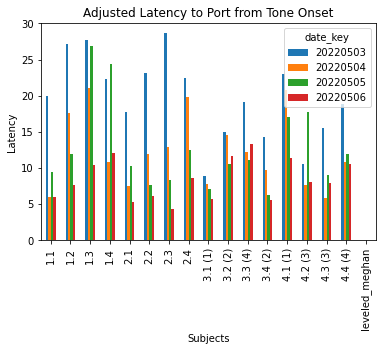

In [29]:
latency_pivot_plot.plot(y=["20220503", "20220504", "20220505", "20220506"], kind="bar", ylabel="Latency", xlabel="Subjects", title="Adjusted Latency to Port from Tone Onset")

In [30]:
less_than_10_latency_pivot_plot = combined_latency_df.pivot_table(
        values='latency_less_than_10_seconds', 
        index=['subject_key'], 
        columns='date_key', 
        aggfunc=np.mean)

In [31]:
less_than_10_latency_pivot_plot

date_key,20220502,20220503,20220504,20220505,20220506
subject_key,,,,,
1.1,NaN,0.333333,0.780488,0.675000,0.829268
1.2,NaN,0.071429,0.410256,0.487805,0.675000
1.3,NaN,0.000000,0.236842,0.075000,0.600000
1.4,NaN,0.200000,0.487805,0.200000,0.512195
2.1,NaN,0.250000,0.775000,0.658537,0.875000
2.2,NaN,0.200000,0.487805,0.750000,0.804878
2.3,NaN,0.066667,0.487805,0.725000,0.902439
2.4,NaN,0.250000,0.282051,0.550000,0.675000
3.1 (1),NaN,0.675000,0.780488,0.800000,0.825000


In [32]:
less_than_10_latency_pivot_plot.to_csv("./data/latency_dataframes/less_than_10_latency_pivot_table.csv")
less_than_10_latency_pivot_plot.to_excel("./data/latency_dataframes/less_than_10_latency_pivot_table.xlsx")

<AxesSubplot:title={'center':'Ratio of Latencies Less than 10 Seconds Over Time'}, xlabel='Subjects', ylabel='Ratio of Latencies less than 10 Seconds'>

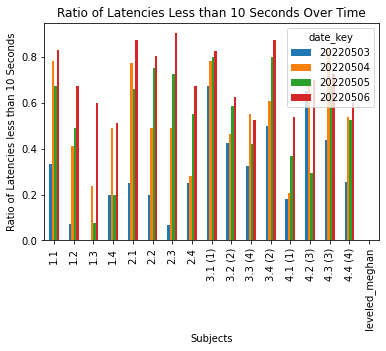

In [33]:
less_than_10_latency_pivot_plot.plot(y=["20220503", "20220504", "20220505", "20220506"], kind="bar", ylabel="Ratio of Latencies less than 10 Seconds", xlabel="Subjects", title="Ratio of Latencies Less than 10 Seconds Over Time")

# Getting the port entry precision

## 1. Get all the numbers that are within the duration

### 1.1 Processing the Dataframe to remove all rows with NaNs

In [157]:
example_med_pc_df = file_path_to_med_pc_data["./data/timestamp_dataframes/2022-05-03_14h49m_Subject 3.2 (2).txt"]["med_pc_df"]
example_med_pc_df = example_med_pc_df.dropna(subset=("(P)Portentry", "(N)Portexit"))

In [158]:
example_med_pc_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity
0,71.36,64.0,399.0,0.0,60.01,71.42,1.0,0.0
1,71.77,144.0,399.0,0.0,140.01,84.39,1.0,0.0
2,84.47,234.0,399.0,0.0,230.01,85.11,1.0,0.0
3,107.97,314.0,399.0,0.0,310.01,116.64,1.0,0.0
4,157.91,489.0,399.0,0.0,385.01,158.15,1.0,0.0
...,...,...,...,...,...,...,...,...
334,3620.40,NaN,NaN,0.0,NaN,3620.80,0.0,0.0
335,3625.02,NaN,NaN,0.0,NaN,3637.30,0.0,0.0
336,3644.60,NaN,NaN,0.0,NaN,3650.22,0.0,0.0
337,3656.06,NaN,NaN,0.0,NaN,3656.84,0.0,0.0


### 1.2 Making All the Times Into Whole Numbers

In [167]:
def scale_time_to_whole_number(time, multiplier=100):
    """
    Function used to convert times that are floats into whole numbers by scaling it. i.e. from 71.36 to 7136
    This is used with pandas.DataFrame.apply/pandas.Series.apply to convert a column of float times to integer times.

    Args:
        time: float
            - The time in seconds that something is happening
    Returns: 
        int:
            - Converted whole number time
    """
    try:
        if np.isnan(time):
            return 0
        else:
            return int(time * multiplier)
    except:
        return 0

In [160]:
example_med_pc_df["port_entry_scaled"] = example_med_pc_df["(P)Portentry"].apply(lambda x: scale_time_to_whole_number(x))
example_med_pc_df["port_exit_scaled"] = example_med_pc_df["(N)Portexit"].apply(lambda x: scale_time_to_whole_number(x))
example_med_pc_df["tone_start_scaled"] = example_med_pc_df["(S)CSpresentation"].apply(lambda x: scale_time_to_whole_number(x))

/tmp/ipykernel_4194049/4182473659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_med_pc_df["port_entry_scaled"] = example_med_pc_df["(P)Portentry"].apply(lambda x: scale_time_to_whole_number(x))
/tmp/ipykernel_4194049/4182473659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_med_pc_df["port_exit_scaled"] = example_med_pc_df["(N)Portexit"].apply(lambda x: scale_time_to_whole_number(x))
/tmp/ipykernel_4194049/4182473659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [162]:
example_med_pc_df.head(n=25)

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,port_entry_scaled,port_exit_scaled,tone_start_scaled
0,71.36,64.0,399.0,0.0,60.01,71.42,1.0,0.0,7136,7142,6001
1,71.77,144.0,399.0,0.0,140.01,84.39,1.0,0.0,7177,8439,14001
2,84.47,234.0,399.0,0.0,230.01,85.11,1.0,0.0,8447,8511,23001
3,107.97,314.0,399.0,0.0,310.01,116.64,1.0,0.0,10797,11664,31001
4,157.91,489.0,399.0,0.0,385.01,158.15,1.0,0.0,15791,15815,38501
5,204.79,584.0,399.0,0.0,485.01,205.06,1.0,0.0,20479,20506,48501
6,205.08,674.0,399.0,0.0,580.01,209.32,1.0,0.0,20508,20932,58001
7,298.49,754.0,399.0,0.0,670.01,304.61,1.0,0.0,29849,30461,67001
8,385.34,844.0,399.0,0.0,750.01,385.40,1.0,0.0,38534,38540,75001
9,385.47,944.0,399.0,0.0,840.01,395.82,1.0,0.0,38547,39582,84001


In [169]:
def get_all_port_entry_increments(port_entry_scaled, port_exit_scaled):
    """
    Gets all the numbers that are in the duration of the port entry and port exit times. 
    i.e. If the port entry was 7136 and port exit was 7142, we'd get [7136, 7137, 7138, 7139, 7140, 7141, 7142]
    This is done for all port entry and port exit times pairs between two Pandas Series

    Args:
        port_entry_scaled: Pandas Series
            - A column from a MED-PC Dataframe that has all the port entry times scaled
            (usually with the scale_time_to_whole_number function)
        port_exit_scaled: Pandas Series
            - A column from a MED-PC Dataframe that has all the port exit times scaled
            (usually with the scale_time_to_whole_number function)
    Returns: 
        Numpy array:
            - 1D Numpy Array of all the numbers that are in the duration of all the port entry and port exit times
    """
    all_port_entry_ranges = [np.arange(port_entry, port_exit+1) for port_entry, port_exit in zip(port_entry_scaled, port_exit_scaled)]
    return np.concatenate(all_port_entry_ranges)

In [165]:
example_port_entry_times = get_all_port_entry_increments(port_entry_scaled=example_med_pc_df["port_entry_scaled"], port_exit_scaled=example_med_pc_df["port_exit_scaled"])

In [168]:
example_port_entry_times[:10]

array([7136, 7137, 7138, 7139, 7140, 7141, 7142, 7177, 7178, 7179])

## 2. Make a set and see which numbers are in that set

In [108]:
example_valid_tone_times = processing.tone.get_valid_tones(tone_pd_series=example_med_pc_df["tone_start_scaled"]).astype(int)

- Using the last tone and adding 2000(or 20 seconds to it)

In [113]:
example_experiment_interval = np.arange(example_valid_tone_times.max() + 2001)

In [114]:
example_experiment_interval

array([     0,      1,      2, ..., 372499, 372500, 372501])

In [117]:
example_port_entry_mask = np.isin(example_experiment_interval, example_port_entry_times)

In [118]:
example_port_entry_mask

array([False, False, False, ..., False, False, False])

In [122]:
example_experiment_interval[np.isin(example_experiment_interval, example_port_entry_times)]

array([  7136,   7137,   7138, ..., 370393, 370394, 370395])

## 3. Find the Overlap between the Tone Times and the Port Entries

In [126]:
tone_time_to_mask = defaultdict(dict)
example_all_tone_time_masks = []
for index, tone_start in example_valid_tone_times.iteritems():
    tone_start_int = int(tone_start)
#     print(tone_start_int)
#     print(example_port_entry_mask[tone_start_int - 2000: tone_start_int + 2000])  
    example_all_tone_time_masks.append(example_port_entry_mask[tone_start_int - 2000: tone_start_int + 2000])
    tone_time_to_mask[tone_start_int] = example_port_entry_mask[tone_start_int - 2000: tone_start_int + 2000]

In [127]:
tone_time_to_mask

defaultdict(dict,
            {6001: array([False, False, False, ...,  True,  True,  True]),
             14001: array([False, False, False, ..., False, False, False]),
             23001: array([False, False, False, ..., False, False, False]),
             31001: array([False, False, False, ..., False, False, False]),
             38501: array([False, False, False, ..., False, False, False]),
             48501: array([False, False, False, ..., False, False, False]),
             58001: array([False, False, False, ..., False, False, False]),
             67001: array([ True,  True,  True, ..., False, False, False]),
             75001: array([False, False, False, ..., False, False, False]),
             84001: array([False, False, False, ...,  True,  True,  True]),
             94001: array([ True,  True,  True, ..., False, False, False]),
             103001: array([False, False, False, ...,  True,  True,  True]),
             115001: array([False, False, False, ...,  True,  True,  T

In [129]:
stacked_example_all_tone_time_masks = np.stack(example_all_tone_time_masks)

In [133]:
mean_example_all_tone_time_masks = stacked_example_all_tone_time_masks.mean(axis=0)

In [135]:
mean_example_all_tone_time_masks

array([0.2195122 , 0.2195122 , 0.2195122 , ..., 0.29268293, 0.29268293,
       0.29268293])

Text(0.5, 1.0, 'Probability Inside Port for 10ms Increments 20 Seconds Before and After Tone')

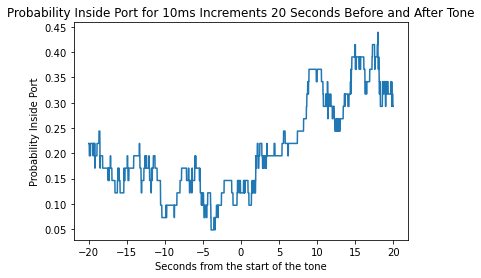

In [140]:
plt.plot(np.linspace(-20,20,4000), mean_example_all_tone_time_masks)
plt.xlabel("Seconds from the start of the tone")
plt.ylabel("Probability Inside Port")
plt.title("Probability Inside Port for 10ms Increments 20 Seconds Before and After Tone")

array([-2000, -1999, -1998, ...,  1998,  1999,  2000])

In [34]:
raise ValueError("Stop Here and Continue Editing!")

ValueError: Stop Here and Continue Editing!

In [ ]:
file_path_to_meta_data

In [ ]:
result_dict = defaultdict(dict)
for key, value in file_path_to_meta_data.items():
    try:
        latency_df = value["latency_df"]
        latency_df["latency"] = latency_df["first_port_entry_after_tone"] - latency_df["current_tone_time"]
        latency = latency_df["latency"].mean()
        result_dict[key] = value
        result_dict[key]["latency"] = latency
        
        result_dict[key]["latency"] = sum(latency_df["latency"] <= 10) / len(latency_df)
    except:
        pass

In [ ]:
#TODO: Limit latency
TOTO: get a row for each subject

In [ ]:
all_latency_df = pd.DataFrame.from_dict(result_dict, orient="index")

In [ ]:
all_latency_df["date_key"] = all_latency_df["date_key"].astype(int)

In [ ]:
all_latency_df.sort_values("subject_key").head()

In [ ]:
all_latency_df.sort_values("date_key").head(n=50)

In [ ]:
plt.plot(all_latency_df["date_key"], all_latency_df["latency"])

    file

## Simple Calculations

- Getting the duration of the time that the mice was in the port

In [ ]:
med_pc_df[port_exit_column] - med_pc_df[port_entry_column]

# 1. Latency to port from tone onset

## Remove all unnecessary numbers and NaNs in the tone times

In [ ]:
tone_pd_series = med_pc_df["(S)CSpresentation"]

- The tone times column has unnecessary numbers and NaNs that must be removed

In [ ]:
med_pc_df["(S)CSpresentation"][35:50]

In [ ]:
med_pc_df["(S)CSpresentation"][-20:]

- Finding the first port entry after tone plays
    - ** NOTE: This does not count entries that started before the tone and continure after the tone started

In [ ]:
valid_tones = processing.tone.get_valid_tones(tone_pd_series=tone_pd_series)

In [ ]:
valid_tones

In [ ]:
def get_first_port_entries(tone_pd_series, port_entries_pd_series):
    """
    """
    # Creating a dictionary of index(current row number we're on) to current/next tone time and first port entry
    latency_dict = defaultdict(dict)
    for index, current_tone_time in tone_pd_series.items():
        # Using a counter so that we don't go through all the rows that include NaNs
        try:
            latency_dict[index]["current_tone_time"] = current_tone_time
            # Getting all the port entries that happened after the tone started
            # And then getting the first one of those port entries
            first_port_entry_after_tone = port_entries_pd_series[port_entries_pd_series >= current_tone_time].min()
            latency_dict[index]["first_port_entry_after_tone"] = first_port_entry_after_tone
        except:
            print("Look over value {} at index {}".format(current_tone_time, index))
    return latency_dict

In [ ]:
port_entry_series = med_pc_df["(P)Portentry"]

In [ ]:
port_entry_series[port_entry_series >= 60.01].min()

In [ ]:
counter = 0
# Creating a dictionary of index(current row number we're on) to current/next tone time and first port entry
latency_dict = defaultdict(dict)
for index, row in med_pc_df.iterrows():
    # Using a counter so that we don't go through all the rows that include NaNs
    if counter >= 40:
        break
    try:
        # The time of the current tone that we're on
        current_tone_time = row[tone_start_column]
        latency_dict[index]["current_tone_time"] = current_tone_time
        # The time of the next tone after the current tone
        next_tone_time = med_pc_df.iloc[index + 1][tone_start_column]
        latency_dict[index]["next_tone_time"] = next_tone_time
        # Getting all the port entries that happened after the tone started
        # And then getting the first one of those port entries
        first_port_entry_after_tone = med_pc_df[med_pc_df[port_entry_column] >= current_tone_time][port_entry_column].min()
        latency_dict[index]["first_port_entry_after_tone"] = first_port_entry_after_tone
    except:
        break
    counter += 1
    

In [ ]:
get_first_port_entries(tone_pd_series=valid_tones, port_entries_pd_series=med_pc_df["(P)Portentry"])

In [ ]:
med_pc_df["(P)Portentry"]

In [ ]:
latency_dict[0]

- Creating a dataframe from the dictionary

In [ ]:
latency_df = pd.DataFrame.from_dict(latency_dict, orient="index")

- Calculating latency, which is the first port entry time minus the start of the tone

In [ ]:
latency_df["latency"] = latency_df["first_port_entry_after_tone"] - latency_df["current_tone_time"]

In [ ]:
# Filtering for all the latencies that are less than 30 seconds
latency_df[latency_df["latency"] <= 30]

In [ ]:
latency_df["latency"].mean()

# 2. Ratio of adequate retrival

- Calculating the ratio of adequate retrivals. Which are retrivals with latencies of less than 10 seconds

In [ ]:
# Counting the number of retrivals that are less than 10 seconds
# Getting the total number of tones being played
sum(latency_df["latency"] <= 10) / len(latency_df)

# 3. Plotting the probability of inside port

- Plotting the duration that the mice are in the ports and the duration of the tones
    - Top is port entry duration and bottom is tone duration

# TODO: Try plotting so that whenever there's a port entry or tone, the line goes to 1

In [ ]:
fig, ax = plt.subplots()

# Port duration is from one port entry to the corresponding por exit
for x_1 , x_2 in zip(med_pc_df['(P)Portentry'].values ,med_pc_df['(N)Portexit'].values):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,0.5, color="k"))

# Tone duration is from tone start to 20 seconds after
for x_1 in (latency_df['current_tone_time'].values):
    ax.add_patch(plt.Rectangle((x_1,-.75),20,0.5, color="b"))
    
# Tone duration is from 20 seconds before to tone start
for x_1 in (latency_df['current_tone_time'].values):
    ax.add_patch(plt.Rectangle((x_1-20,-.75),20,0.5, color="r") )
    
ax.autoscale()
ax.set_ylim(-1,1)
plt.title("Duration of port entries and tones")
plt.xlabel("Time from start")
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Port duration is from one port entry to the corresponding por exit
for x_1 , x_2 in zip(med_pc_df['(P)Portentry'].values ,med_pc_df['(N)Portexit'].values):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,0.5, color="k"))

# Tone duration is from tone start to 20 seconds after
for x_1 in (latency_df['current_tone_time'].values):
    ax.add_patch(plt.Rectangle((x_1,-.75),20,0.5, color="b"))
    
# Tone duration is from 20 seconds before to tone start
for x_1 in (latency_df['current_tone_time'].values):
    ax.add_patch(plt.Rectangle((x_1-20,-.75),20,0.5, color="r") )
    
ax.autoscale()
ax.set_ylim(-1,1)
ax.set_xlim(1000,1100)
plt.title("Duration of port entries and tones")
plt.xlabel("Time from start")
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Port duration is from one port entry to the corresponding por exit
for x_1 , x_2 in zip(med_pc_df['(P)Portentry'].values ,med_pc_df['(N)Portexit'].values):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,0.5, color="k"))

# Tone duration is from tone start to 20 seconds after
for x_1 in (latency_df['current_tone_time'].values):
    ax.add_patch(plt.Rectangle((x_1,-.75),20,0.5, color="b"))
    
# Tone duration is from 20 seconds before to tone start
for x_1 in (latency_df['current_tone_time'].values):
    ax.add_patch(plt.Rectangle((x_1-20,-.75),20,0.5, color="r") )
    
ax.autoscale()
ax.set_ylim(-1,1)
ax.set_xlim(1080,1100)
plt.title("Duration of port entries and tones")
plt.xlabel("Time from start")
plt.show()

In [ ]:
med_pc_df.iloc[130:150]

### 3.1 Scaling all the times so that we can get all the numbers in between

In [ ]:
med_pc_df["port_entry_scaled"] = (med_pc_df[port_entry_column] * 100).astype(int)
med_pc_df["port_exit_scaled"] = (med_pc_df[port_exit_column] * 100).astype(int)
med_pc_df["tone_start_scaled"] = med_pc_df[tone_start_column].apply(lambda x: x * 100 if not np.isnan(x) else np.nan)

In [ ]:
med_pc_df.head(n=25)

### 3.2 Getting the numbers that overlap between a single tone duration and port entry

In [ ]:
def get_overlapping_range(tone_start, tone_end, port_entry, port_exit):
    """
    """
    if tone_start >= tone_end or port_entry >= port_exit:
        raise ValueError("Start time needs to be before end time")
    # Port exit is before tone_start
    if port_exit <= tone_start:
        return 0,0
    # Port entry is after tone end
    elif port_entry >= tone_end:
        return 0,0
    # Port entry is before tone start
    if port_entry <= tone_start:
        port_entry = tone_start
    # Port exit is after tone end
    if port_exit >= tone_end:
        port_exit = tone_end
    return port_entry, port_exit

- When there is no overlap before or after the tone

In [ ]:
get_overlapping_range(port_entry=2960, port_exit=3038, tone_start=6001, tone_end=7001)

In [ ]:
get_overlapping_range(port_entry=15467, port_exit=15472, tone_start=6001, tone_end=7001)

- When there is all overlap within the tone

In [ ]:
get_overlapping_range(port_entry=6131, port_exit=6177, tone_start=6001, tone_end=7001)

- When there is partial overlap with the tone

In [ ]:
get_overlapping_range(port_entry=5900, port_exit=6177, tone_start=6001, tone_end=7001)

In [ ]:
get_overlapping_range(port_entry=6800, port_exit=7200, tone_start=6001, tone_end=7001)

## 3.2 Getting all the overlapping port entries time stamps with the tone durations

### Getting the times in between all the port entries and exits

In [ ]:
port_entry_times = med_pc_df["port_entry_scaled"].values
port_exit_times = med_pc_df["port_exit_scaled"].values

- Making a 2D array of the port entry and exit times

In [ ]:
np.column_stack((port_entry_times, port_exit_times))[:10]

In [ ]:
def get_all_numbers_in_range(before_array, after_array):
    """
    """
    all_ranges = None
    for first_number, second_number in np.column_stack((before_array, after_array)):
        current_range = np.arange(first_number, second_number)
        if all_ranges is None:
            all_ranges = current_range
        else:
            all_ranges = np.concatenate((all_ranges, current_range))
    return all_ranges

In [ ]:
masked_range = get_all_numbers_in_range(port_entry_times, port_exit_times)

In [ ]:
masked_range[:100]

## 3.3 Getting the ratio of the overlap

In [ ]:
def get_overlapping_ratio(tone_start, tone_end, port_entry, port_exit):
    """
    """
    overlapping_range = get_overlapping_range(tone_start=tone_start, tone_end=tone_end, \
                                              port_entry=port_entry, port_exit=port_exit)
    return (overlapping_range[1] - overlapping_range[0]) / (tone_end - tone_start)

- When there is no overlap before or after the tone

In [ ]:
get_overlapping_ratio(port_entry=2960, port_exit=3038, tone_start=6001, tone_end=7001)

In [ ]:
get_overlapping_ratio(port_entry=15467, port_exit=15472, tone_start=6001, tone_end=7001)

- When there is all overlap within the tone

In [ ]:
get_overlapping_ratio(port_entry=6131, port_exit=6177, tone_start=6001, tone_end=7001)

- When there is partial overlap with the tone

In [ ]:
get_overlapping_ratio(port_entry=5900, port_exit=6177, tone_start=6001, tone_end=7001)

In [ ]:
get_overlapping_ratio(port_entry=6800, port_exit=7200, tone_start=6001, tone_end=7001)

- When there is total overlap of the tone

In [ ]:
get_overlapping_ratio(port_entry=5500, port_exit=7500, tone_start=6001, tone_end=7001)

### 3.4 Get all the overlapping ranges for one tone 

- The port entry must always be before the end of the tone
- The port exit must always be after the start of the tone

In [ ]:
med_pc_df.head(n=10)

In [ ]:
def get_all_overlapping_ranges(tone_start, tone_end, med_pc_df, port_entry_column='(P)Portentry', port_exit_column='(N)Portexit'):
    """
    """
    return med_pc_df[(med_pc_df[port_exit_column] >= tone_start) & (med_pc_df[port_entry_column] <= tone_end)]

In [ ]:
tone_start = 60
tone_end = 90

In [ ]:
overlapped_df = get_all_overlapping_ranges(tone_start=tone_start, tone_end=tone_end, med_pc_df=med_pc_df)

In [ ]:
overlapped_df

### 3.5 Get the sum of the overlap ratio for all overlapping port entries 

In [ ]:
def calculate_total_overlap_ratio(med_pc_df, tone_start, tone_end, port_entry_column='(P)Portentry', port_exit_column='(N)Portexit'):
    """
    """
    all_overlap_ratios = []
    overlapped_df = get_all_overlapping_ranges(tone_start=tone_start, tone_end=tone_end, med_pc_df=med_pc_df, port_entry_column=port_entry_column, port_exit_column=port_exit_column)
    
    for index, row in overlapped_df.iterrows():
        overlap_ratio = get_overlapping_ratio(port_entry=row[port_entry_column], port_exit=row[port_exit_column], tone_start=tone_start, tone_end=tone_end)
        all_overlap_ratios.append(overlap_ratio)
    return sum(all_overlap_ratios)

In [ ]:
calculate_total_overlap_ratio(med_pc_df=med_pc_df, tone_start=60, tone_end=90)

### 3.6 Plot overlap ratios for one trial

In [ ]:
tone_start = 60

- Getting the time sub-time intervals for each tone duration
    - We will look into the time 20 seconds before and after the tone starts

- For the sub time intervals that are one second

In [ ]:
evenly_spaced_ones_intervals = np.linspace(0 - 20, 0 + 20, 41)

In [ ]:
evenly_spaced_ones_intervals

In [ ]:
evenly_spaced_ones_numbers = evenly_spaced_ones_intervals + 60

In [ ]:
evenly_spaced_ones_numbers

In [ ]:
evenly_spaced_ones_numbers + 60

- For the sub time intervals that are one tenth of a second

In [ ]:
evenly_spaced_tenths_intervals = np.linspace(0 - 20, 0 + 20, 401)

In [ ]:
evenly_spaced_tenths_numbers = evenly_spaced_tenths_intervals + 60

In [ ]:
evenly_spaced_tenths_numbers

### 3.61 Getting all the overlap ratios for the tone that starts at 60 seconds

In [ ]:
med_pc_df.head(n=25)

In [ ]:
tone_start_time = 60

- For one second intervals

In [ ]:
calculate_total_overlap_ratio(med_pc_df=med_pc_df, tone_start=47, tone_end=48)

In [ ]:
tone_ratio_ones_dict = defaultdict(dict)
for index, tone_start_ones in enumerate(evenly_spaced_ones_intervals):
    actual_start_time = tone_start_ones + tone_start_time
    actual_end_time = actual_start_time + 1
    tone_ratio_ones_dict[actual_start_time]["tone_start_ones"] = tone_start_ones 
    overlap_ratio = calculate_total_overlap_ratio(med_pc_df=med_pc_df, tone_start=actual_start_time, tone_end=actual_end_time)
    tone_ratio_ones_dict[actual_start_time]["overlap_ratio"] = overlap_ratio


In [ ]:
tone_ratio_ones_dict

- For one tenth of second intervals

In [ ]:
tone_ratio_tenths_dict = defaultdict(dict)
for index, tone_start_tenths in enumerate(evenly_spaced_tenths_intervals):
    actual_start_time = tone_start_tenths + tone_start_time
    actual_end_time = actual_start_time + 0.1
    tone_ratio_tenths_dict[actual_start_time]["tone_start_ones"] = tone_start_tenths 
    overlap_ratio = calculate_total_overlap_ratio(med_pc_df=med_pc_df, tone_start=actual_start_time, tone_end=actual_end_time)
    tone_ratio_tenths_dict[actual_start_time]["overlap_ratio"] = overlap_ratio


In [ ]:
tone_ratio_tenths_dict

In [ ]:
overlap_interval_ones_df = pd.DataFrame.from_dict(tone_ratio_ones_dict, orient="index")
overlap_interval_tenths_df = pd.DataFrame.from_dict(tone_ratio_tenths_dict, orient="index")

In [ ]:
overlap_interval_ones_df.head()

In [ ]:
overlap_interval_tenths_df.head(n=50)

In [ ]:
plt.plot(overlap_interval_ones_df["tone_start_ones"], overlap_interval_ones_df["overlap_ratio"])

In [ ]:
plt.plot(overlap_interval_tenths_df["tone_start_ones"], overlap_interval_tenths_df["overlap_ratio"])

# 3.7 Plot all the tones and average them

In [ ]:
# Using head because after 40 all the values just become random place holders
tone_start_times = med_pc_df[tone_start_column].dropna().head(39)

In [ ]:
tone_start_times

- For second intervals

In [ ]:
all_tone_ratio_seconds_list = []
for tone_start_time in tone_start_times:
    tone_ratio_dict = defaultdict(dict)
    for index, tone_start_ones in enumerate(evenly_spaced_ones_intervals):
        actual_time = tone_start_ones + tone_start_time
        tone_ratio_dict[actual_time]["tone_start_ones"] = tone_start_ones 
        overlap_ratio = calculate_total_overlap_ratio(med_pc_df=med_pc_df, tone_start=actual_time, tone_end=actual_time + 1)
        tone_ratio_dict[actual_time]["overlap_ratio"] = overlap_ratio
    all_tone_ratio_seconds_list.append(tone_ratio_dict)

In [ ]:
combined_ones_dict = {k: v for d in all_tone_ratio_seconds_list for k, v in d.items()}

In [ ]:
combined_ones_dataframe = pd.DataFrame.from_dict(combined_ones_dict, orient="index")

In [ ]:
combined_ones_dataframe

In [ ]:
ones_result = combined_ones_dataframe.groupby('tone_start_ones').mean()

In [ ]:
plt.plot(ones_result.index, ones_result["overlap_ratio"])
plt.title("Proportions of time spent in port during tone")
plt.xlabel("Time from start of tone")
plt.ylabel("Proportion of time spent in port")
plt.show()

- For one tenth of a second intervals 

In [ ]:
all_tone_ratio_tenths_list = []
for tone_start_time in tone_start_times:
    tone_ratio_dict = defaultdict(dict)
    for index, tone_start_tenths in enumerate(evenly_spaced_tenths_intervals):
        actual_time = tone_start_tenths + tone_start_time
        tone_ratio_dict[actual_time]["tone_start_tenths"] = tone_start_tenths
        overlap_ratio = calculate_total_overlap_ratio(med_pc_df=med_pc_df, tone_start=actual_time, tone_end=actual_time + 0.1)
        tone_ratio_dict[actual_time]["overlap_ratio"] = overlap_ratio
    all_tone_ratio_tenths_list.append(tone_ratio_dict)

In [ ]:
combined_tenths_dict = {k: v for d in all_tone_ratio_tenths_list for k, v in d.items()}

In [ ]:
combined_tenths_dataframe = pd.DataFrame.from_dict(combined_tenths_dict, orient="index")

In [ ]:
combined_tenths_dataframe

In [ ]:
tenths_result = combined_tenths_dataframe.groupby('tone_start_tenths').mean()

In [ ]:
plt.plot(tenths_result.index, tenths_result["overlap_ratio"])
plt.title("Proportions of time spent in port during tone")
plt.xlabel("Time from start of tone")
plt.ylabel("Proportion of time spent in port")
plt.show()

# TODO: 4. Licking Specifity Average

average(probability(t=0-10)) -average(probability(t=-20:0))

# TODO: Get the average of each time second interval for the sessions